In [1]:
import numpy as np                # For numerical operations and handling arrays
import pandas as pd               # For data manipulation (loading dataset, handling missing values)
import matplotlib.pyplot as plt    # For plotting (confusion matrix visualization)
import seaborn as sns             # For enhanced visualization (heatmaps)
from sklearn.model_selection import train_test_split  # To split data into training and test sets
from sklearn.impute import SimpleImputer  # To handle missing data (imputation)


In [2]:
# Load the dataset (assuming it's in CSV format)
data = pd.read_csv("spambase/spambase.data", header=None)  # Load the data from the file

# Show basic information about the dataset (shape and first 5 rows)
print("Dataset shape:", data.shape)
print("\nFirst 5 rows of the dataset:\n", data.head())


Dataset shape: (4601, 58)

First 5 rows of the dataset:
      0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]


The dataset we've provided is a numerical matrix representing the features of the Spambase dataset. Each row represents a data sample (an email), and each column represents a feature (e.g., the frequency of certain words or attributes related to the email content). The last column contains the target label (0 = not spam, 1 = spam).

In [3]:
# Check for missing values in the dataset
print("Missing values in the dataset:\n", data.isnull().sum())  # this help us to indentify if we have missing value, these methods return 
                                                                # DataFrame of the same shape where each cell is either True 
                                                                # (if the value is missing) or False (if the value is not missing).

# Handle missing values by imputing with the mean of each column (for numerical data)
imputer = SimpleImputer(strategy='mean')  # We are using mean imputation for missing values
data_imputed = pd.DataFrame(imputer.fit_transform(data))  # Impute the missing values and convert back to DataFrame

# Verify that there are no more missing values
print("Missing values after imputation:\n", data_imputed.isnull().sum())


Missing values in the dataset:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
57    0
dtype: int64
Missing values after imputation:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
54    0
55    0
56    0
5

In [4]:
# Separate features (X) and target labels (y)
X = data_imputed.iloc[:, :-1].values  # Features are all columns except the last one
y = data_imputed.iloc[:, -1].values   # Target labels are the last column (0 = not spam, 1 = spam)

# Show the first 5 feature rows and target labels
print("\nFirst 5 feature rows:\n", X[:5])
print("\nFirst 5 labels:\n", y[:5])



First 5 feature rows:
 [[0.000e+00 6.400e-01 6.400e-01 0.000e+00 3.200e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.400e-01 0.000e+00 0.000e+00
  0.000e+00 3.200e-01 0.000e+00 1.290e+00 1.930e+00 0.000e+00 9.600e-01
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 7.780e-01 0.000e+00 0.000e+00 3.756e+00 6.100e+01
  2.780e+02]
 [2.100e-01 2.800e-01 5.000e-01 0.000e+00 1.400e-01 2.800e-01 2.100e-01
  7.000e-02 0.000e+00 9.400e-01 2.100e-01 7.900e-01 6.500e-01 2.100e-01
  1.400e-01 1.400e-01 7.000e-02 2.800e-01 3.470e+00 0.000e+00 1.590e+00
  0.000e+00 4.300e-01 4.300e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 7.000e-02 0.000

In [5]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show the size of the training and testing sets
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 3680
Test set size: 921


In [6]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape      # Number of samples and features
        self._classes = np.unique(y)         # Unique class labels (0 =spam and 1 - not spam)
        n_classes = len(self._classes)       # Number of classes (2: spam, not spam)

        # Create empty tables for statistics
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)   # Mean per class per feature
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)    # Variance per class per feature
        self._priors = np.zeros(n_classes, dtype=np.float64)              # Prior probability per class

        # Compute statistics for each class
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]                   # Select rows belonging to class c
            self._mean[idx, :] = X_c.mean(axis=0)   # Calculate mean of each feature
            self._var[idx, :] = X_c.var(axis=0) + 1e-9   # Calculate variance of each feature (avoid zero variance)
            self._priors[idx] = X_c.shape[0] / float(n_samples)  # Class prior probability

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]   # Predict the class label for each sample
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []                         # Store probability score per class

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])   # Log of prior probability
            likelihood = np.sum(np.log(self._pdf(idx, x)))   # Log of likelihoods
            posterior = prior + likelihood     # Bayes' theorem (log form)
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]  # Return the class with the highest posterior

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]

        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)

        pdf = numerator / denominator
        pdf = np.where(pdf == 0, 1e-9, pdf)  # Prevent log(0) by replacing zeros with a small value

        return pdf


Model Accuracy: 73.94%

Confusion Matrix:
 [[334 224]
 [ 16 347]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.60      0.74       558
         1.0       0.61      0.96      0.74       363

    accuracy                           0.74       921
   macro avg       0.78      0.78      0.74       921
weighted avg       0.82      0.74      0.74       921



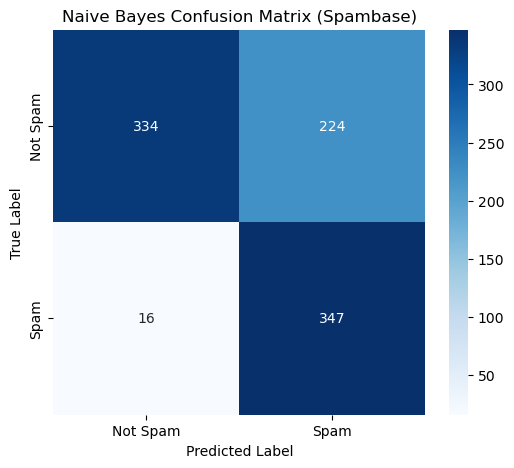

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create an instance (object) of our Naive Bayes classifier
nb = NaiveBayes()  # Initialize the Naive Bayes model object

# Train the model using the training data
nb.fit(X_train, y_train)

# Predict on the test data
y_pred = nb.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy (correct predictions / total predictions)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Naive Bayes Confusion Matrix (Spambase)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


True Negatives (TN): 334 emails were correctly classified as Not Spam.

False Positives (FP): 224 emails were incorrectly classified as Spam (they are actually Not Spam).

False Negatives (FN): 16 emails were incorrectly classified as Not Spam (they are actually Spam).

True Positives (TP): 347 emails were correctly classified as Spam.

Possible Improvements:

Improve Precision for Spam: We can try techniques like threshold tuning to reduce false positives for spam (e.g., make the model more conservative about predicting an email as spam).

Improve Recall for Not Spam: If false negatives (non-spam emails being classified as spam) are a concern, if want to increase recall for Not Spam at the cost of lowering precision. This would require balancing the decision threshold.

Handle Class Imbalance: If the dataset is imbalanced (more non-spam than spam emails), techniques like oversampling, undersampling, or using class weights can help improve the model’s ability to identify both spam and non-spam emails.

Dataset shape: (4601, 58)

First 5 rows of the dataset:
      0     1     2    3     4     5     6     7     8     9   ...    48  \
0  0.00  0.64  0.64  0.0  0.32  0.00  0.00  0.00  0.00  0.00  ...  0.00   
1  0.21  0.28  0.50  0.0  0.14  0.28  0.21  0.07  0.00  0.94  ...  0.00   
2  0.06  0.00  0.71  0.0  1.23  0.19  0.19  0.12  0.64  0.25  ...  0.01   
3  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   
4  0.00  0.00  0.00  0.0  0.63  0.00  0.31  0.63  0.31  0.63  ...  0.00   

      49   50     51     52     53     54   55    56  57  
0  0.000  0.0  0.778  0.000  0.000  3.756   61   278   1  
1  0.132  0.0  0.372  0.180  0.048  5.114  101  1028   1  
2  0.143  0.0  0.276  0.184  0.010  9.821  485  2259   1  
3  0.137  0.0  0.137  0.000  0.000  3.537   40   191   1  
4  0.135  0.0  0.135  0.000  0.000  3.537   40   191   1  

[5 rows x 58 columns]
Missing values after imputation:
 0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
1

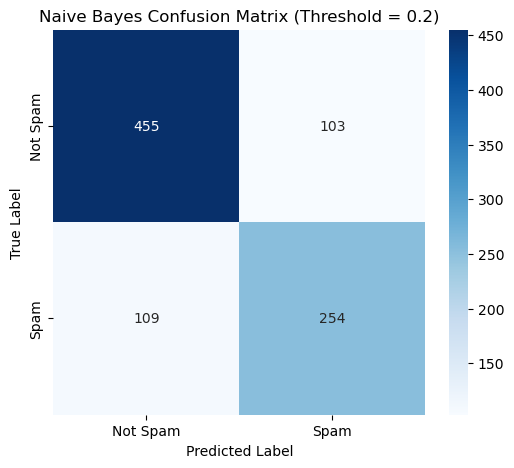

In [15]:
# Import necessary libraries
import numpy as np                # For numerical operations and handling arrays
import pandas as pd               # For loading and handling the dataset (DataFrame)
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.impute import SimpleImputer  # To handle missing data (imputation)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For evaluation
import matplotlib.pyplot as plt    # For plotting (confusion matrix visualization)
import seaborn as sns             # For enhanced visualization (heatmaps)

# Assuming you've already defined your Naive Bayes model class (NaiveBayes) from scratch

# Step 1: Load the dataset
data = pd.read_csv("spambase/spambase.data", header=None)  # Load the data from the file
print("Dataset shape:", data.shape)
print("\nFirst 5 rows of the dataset:\n", data.head())

# Step 2: Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean of each column
data_imputed = pd.DataFrame(imputer.fit_transform(data))  # Impute missing values
print("Missing values after imputation:\n", data_imputed.isnull().sum())

# Step 3: Separate features and labels
X = data_imputed.iloc[:, :-1].values  # Features are all columns except the last one
y = data_imputed.iloc[:, -1].values   # Target labels are the last column (0 = not spam, 1 = spam)

# Step 4: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}") 

class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape      # Number of samples and features
        self._classes = np.unique(y)         # Unique class labels (0 and 1)
        n_classes = len(self._classes)       # Number of classes (2: spam, not spam)

        # Create empty tables for statistics
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)   # Mean per class per feature
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)    # Variance per class per feature
        self._priors = np.zeros(n_classes, dtype=np.float64)              # Prior probability per class

        # Compute statistics for each class
        for idx, c in enumerate(self._classes):
            X_c = X[y == c]                   # Select rows belonging to class c
            self._mean[idx, :] = X_c.mean(axis=0)   # Calculate mean of each feature
            self._var[idx, :] = X_c.var(axis=0) + 1e-9   # Calculate variance of each feature (avoid zero variance)
            self._priors[idx] = X_c.shape[0] / float(n_samples)  # Class prior probability

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]   # Predict the class label for each sample
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []                         # Store probability score per class

        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])   # Log of prior probability
            likelihood = np.sum(np.log(self._pdf(idx, x)))   # Log of likelihoods
            posterior = prior + likelihood     # Bayes' theorem (log form)
            posteriors.append(posterior)

        return self._classes[np.argmax(posteriors)]  # Return the class with the highest posterior

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]

        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)

        pdf = numerator / denominator
        pdf = np.where(pdf == 0, 1e-9, pdf)  # Prevent log(0) by replacing zeros with a small value

        return pdf

    def predict_proba(self, X):
        """
        This function returns the predicted probabilities for each class.
        For each sample, it calculates the probability of being in each class.
        """
        probas = []

        for x in X:
            # For each sample, compute the probability for each class
            probs = []
            for idx, c in enumerate(self._classes):
                prior = np.log(self._priors[idx])   # Log of prior probability
                likelihood = np.sum(np.log(self._pdf(idx, x)))   # Log of likelihoods
                posterior = prior + likelihood     # Bayes' theorem (log form)
                probs.append(np.exp(posterior))    # Convert log probabilities back to normal

            probas.append(probs)  # Add the computed probabilities for the current sample

        return np.array(probas)  # Return the probabilities as a 2D array (samples x classes)


# Step 5: Train the Naive Bayes model from scratch
nb = NaiveBayes()  # Initialize the Naive Bayes model object
nb.fit(X_train, y_train)  # Train the model using the training data

# Step 6: Get probabilities for class 1 (Spam) from the trained model
y_prob = nb.predict_proba(X_test)[:, 1]  # Get probabilities for the Spam class (1)

# Step 7: Adjust the threshold and predict based on the threshold
threshold = 0.2  # Set the threshold for classifying as Spam (1)
y_pred_adjusted = (y_prob > threshold).astype(int)  # Classify as Spam if probability is greater than threshold

# Step 8: Evaluate the model with the adjusted threshold
accuracy = accuracy_score(y_test, y_pred_adjusted)  # Calculate accuracy (correct predictions / total predictions)
print(f"Model Accuracy with threshold {threshold}: {accuracy * 100:.2f}%")

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adjusted)
print("\nConfusion Matrix (Adjusted Threshold):\n", cm)

# Step 10: Classification Report (Precision, Recall, F1-Score)
print("\nClassification Report (Adjusted Threshold):\n", classification_report(y_test, y_pred_adjusted))

# Step 11: Visualize the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title(f'Naive Bayes Confusion Matrix (Threshold = {threshold})')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
